In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from scipy import optimize

In [2]:
def generate_simulated(x1,N,M,params,T0,TN):
        """
        Generate simulated data for Lomax Stochastic Process
        """
        T=np.zeros((N,1)) 
        h=(TN-T0)/N     
        alpha=params[0]
        sigm=params[2] 
        beta = params[1]
#         gam = params[2]
        for i in range(0,N-1):
            T[i]=T0+(i)*h
        T[N-1] = TN
        X=np.zeros((N,M)) 
        for j in range(M):
            X[0,j]=x1
            Z=np.random.normal(size=(N-1,1))
            for i in range(N-1):
                X[i+1,j]=X[i,j]-((alpha)*X[i,j]*h/(T[i]+beta))+(sigm*(X[i,j])*np.sqrt(h)*Z[i])
        return X, T

In [3]:
x1 = 100
N = 2000
M = 25
params = [1.5 ,90 ,0.01]
TN = 1000
T0 = 0
Y,T = generate_simulated(x1,N,M,params,T0,TN)

In [20]:
def sigma_estimator(alpha,T,X):
    """
        Estimate sigma parameter for  pareto stochastic process this method require X to be defined 
    """
    C=np.zeros(X.shape)
    n = len(X)
    for i in range(1,n):
        C[i]=np.log(X[i]/X[i-1])+((alpha[0])*np.log((T[i]+alpha[1])/(T[i-1]+alpha[1])))
    out1=0
    for i in range(1,n):
        out1=out1+((C[i])**2);
    store=out1;
    out1=(out1/(n-1))+1;
    h = T[3]-T[2] 
    sigma_2 = (np.sqrt(out1)-1)*2/h;
    return np.sqrt(sigma_2)


In [12]:
def alpha_estimator2(alpha,T,X):
    """
        Estimate Alpha parameter for  pareto stochastic process this method require X to be defined 
    """
    C=np.zeros(X.shape)
    n = len(X)
    for i in range(1,n):
        C[i]=np.log(X[i]/X[i-1])+((alpha[0])*np.log((T[i]+alpha[1])/(T[i-1]+alpha[1])))
    out1=0
    for i in range(1,n):
        out1=out1+((C[i])**2);
    store=out1;
    out1=(out1/(n-1))+1;
    h = T[3]-T[2] 
    sigma_2 = (np.sqrt(out1)-1)*2/h;
    out2 = ((n-1)/2)*(np.log(sigma_2) +  np.log(2*np.pi*h)) 
    for i in range(1,n):
        out2=out2+ np.log(X[i]) + (1/(2*sigma_2*h))*((C[i] + np.sqrt(out1) -1 )**2)
    return out2


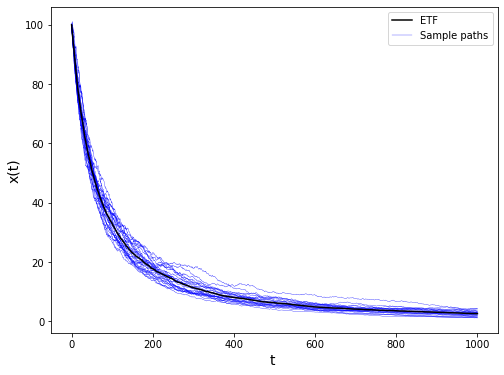

In [11]:
plt.figure(figsize=(8,6))
for i in range(M):
    plt.plot(T, Y[:,i], "b-", linewidth=0.3, label="Sample paths")
plt.plot(T, Y.mean(axis=1), "k-",linewidth=1.5,label="ETF")
handles, labels = plt.gca().get_legend_handles_labels()
# plt.xlim((0.2,0.91))
plt.ylabel("x(t)", fontsize=14)
plt.xlabel("t ", rotation=0, fontsize=14)
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]
plt.legend(handles, labels, loc='best')
#plt.show()
# plt.savefig('simulated1.eps', format='eps')

In [17]:
a=np.zeros((M,1))
b=np.zeros((M,1))
sig = np.zeros((M,1))
for i in range(M):
    X = Y[:,i]
#     res2 = optimize.minimize(alpha_estimator2, x0=np.array([300,20]),args=(T,X), method='Nelder-Mead')
    res2 = optimize.differential_evolution(alpha_estimator2,args= (T,X) , bounds = ((0,5), (0,10000)) ,
                                           strategy = 'rand1exp', seed = 2019)
    #  x0=np.array([25,200])
    a[i] = res2.x[0] 
    b[i]= res2.x[1]
    temp = [a[i],b[i]]
    sig[i] = sigma_estimator(temp,T,X)

C:\Users\amakr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\amakr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply
C:\Users\amakr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


C:\Users\amakr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

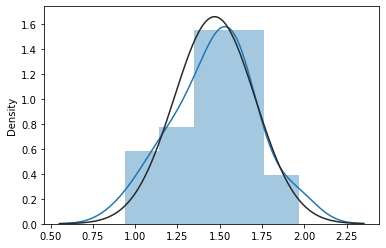

In [31]:
import seaborn as sns
from scipy.stats import norm
sns.distplot(a, fit = norm )
# sns.distplot(b, fit = norm)

In [37]:
print(f"True params are : {params} \nEstimated params are :{[a.mean(), b.mean(), np.array(sig).squeeze().mean()]}" )

True params are : [1.5, 90, 0.01] 
Estimated params are :[1.4699947703748562, 88.75513692243811, 0.010036028858566923]
